In [1]:
!pip install geopandas
!pip install descartes
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import json
import folium
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import TimestampedGeoJson
import datetime
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors
from shapely.geometry import Point
!pip install adjustText
import adjustText as aT
!pip install basemap
%matplotlib inline
print('Here we go!')

     |████████████████████████████████| 931kB 6.6MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 28.3MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 31.0MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 26.9MB/s eta 0:00:01
     |████████████████████████████████| 81kB 17.7MB/s eta 0:00:01
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText
Here we go!


In [2]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [3]:
!pip install geoplot
import geopandas as gpd
import fiona
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt
print("All loaded")

     |████████████████████████████████| 51kB 14.0MB/s eta 0:00:01
     |████████████████████████████████| 8.9MB 16.4MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 112kB 28.8MB/s eta 0:00:01
     |████████████████████████████████| 296kB 31.1MB/s eta 0:00:01
     |████████████████████████████████| 18.1MB 29.3MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cd/cf/40/539f798f94e921e94fd376a5f9d213a6febe77754c0b187c73
Successfully built cartopy
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/96/0c/c1/b2bce9fc10da2e6c6befc9fe5929adca7c71b7c4abd1fc42f0
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/54/f9/95/099544e9f879f719b14cf567fabb5aa7984263df0f025f3eef
Successfully built mapclassify wrapt
All loaded


## Rental data

In [4]:
!pip install xlrd

     |████████████████████████████████| 112kB 8.6MB/s eta 0:00:01


In [5]:
df= pd.read_excel('Rent.xlsx', sheet_name='LGA', skiprows=range(3))
df.head()

,GMR (Greater Metropolitan Region),Greater Sydney,Rings,neighbourhood,Dwelling Types,Bedroom Numbers,First Quartile Weekly Rent for New Bonds\n$,Avg rent,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total properties,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,Total,Total,Total,Total,Total,Total,380,480,600,83778,767546,0.0105,0,0.119,0.0705
1,Total,Total,Total,Total,Total,Bedsitter,315,380,465,1084,8973,-0.0256,-0.0256,0.2605,0.0894
2,Total,Total,Total,Total,Total,1 Bedroom,340,450,550,14939,106473,0,-0.0323,0.1822,0.119
3,Total,Total,Total,Total,Total,Not Specified,350,430,550,2631,54636,-0.0227,-0.0444,-0.059,-0.2073
4,Total,Total,Total,Total,Total,2 Bedrooms,365,470,620,31220,280441,0.0108,-0.0208,0.1206,0.101


In [6]:
df.columns

Index(['GMR (Greater Metropolitan Region)', 'Greater Sydney', 'Rings',
       'neighbourhood', 'Dwelling Types', 'Bedroom Numbers',
       'First Quartile Weekly Rent for New Bonds\n$', 'Avg rent',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total properties', 'Quarterly change in Median Weekly Rent',
       'Annual change in Median Weekly Rent',
       'Quarterly change in New Bonds Lodged',
       'Annual change in New Bonds Lodged'],
      dtype='object')

In [7]:
# rename columns
df.rename(columns = {'GMR (Greater Metropolitan Region)':'GMR','Bedroom Numbers':
                     'Bedroom_numbers','Greater Sydney':'Greater_Sydney','Dwelling Types':'Dwelling_types','Avg rent':'Avg_rent' 
                    }, inplace = True)
df.head()

,GMR,Greater_Sydney,Rings,neighbourhood,Dwelling_types,Bedroom_numbers,First Quartile Weekly Rent for New Bonds\n$,Avg_rent,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total properties,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,Total,Total,Total,Total,Total,Total,380,480,600,83778,767546,0.0105,0,0.119,0.0705
1,Total,Total,Total,Total,Total,Bedsitter,315,380,465,1084,8973,-0.0256,-0.0256,0.2605,0.0894
2,Total,Total,Total,Total,Total,1 Bedroom,340,450,550,14939,106473,0,-0.0323,0.1822,0.119
3,Total,Total,Total,Total,Total,Not Specified,350,430,550,2631,54636,-0.0227,-0.0444,-0.059,-0.2073
4,Total,Total,Total,Total,Total,2 Bedrooms,365,470,620,31220,280441,0.0108,-0.0208,0.1206,0.101


In [8]:
#Filter to keep Greater Sydney data
filter1=df.GMR == "Total"
filter2=df.Rings == "Total"
filter3=df.Bedroom_numbers == "Total"
filter4=df.Greater_Sydney == "Greater Sydney"
all_filters=filter1&filter2&filter3&filter4
df_filtered=df[all_filters]
df_filtered.head()

,GMR,Greater_Sydney,Rings,neighbourhood,Dwelling_types,Bedroom_numbers,First Quartile Weekly Rent for New Bonds\n$,Avg_rent,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total properties,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
8213,Total,Greater Sydney,Total,Total,Total,Total,420,520,650,61348,547984,0,-0.028,0.1393,0.0904
8220,Total,Greater Sydney,Total,Total,House,Total,430,530,695,17815,157505,0,-0.0364,0.1298,0.0995
8227,Total,Greater Sydney,Total,Total,Other,Total,350,440,575,4244,59613,0,-0.0222,0.1476,0.0384
8234,Total,Greater Sydney,Total,Total,Townhouse,Total,445,560,720,4082,43664,0.0182,0,0.0973,0.0355
8241,Total,Greater Sydney,Total,Total,Flat/Unit,Total,420,520,650,35207,287202,0,-0.037,0.1483,0.0992


In [9]:
#extract required columns for mapping
df_map=df_filtered[['neighbourhood','Dwelling_types','Bedroom_numbers','Avg_rent','Total properties','Annual change in Median Weekly Rent']]
df_map.head()

,neighbourhood,Dwelling_types,Bedroom_numbers,Avg_rent,Total properties,Annual change in Median Weekly Rent
8213,Total,Total,Total,520,547984,-0.028
8220,Total,House,Total,530,157505,-0.0364
8227,Total,Other,Total,440,59613,-0.0222
8234,Total,Townhouse,Total,560,43664,0
8241,Total,Flat/Unit,Total,520,287202,-0.037


In [10]:
df_map.shape

(175, 6)

In [11]:
df_map.dtypes

neighbourhood                          object
Dwelling_types                         object
Bedroom_numbers                        object
Avg_rent                               object
Total properties                       object
Annual change in Median Weekly Rent    object
dtype: object

In [12]:
#replace non numeric with 0
df_map1=df_map.replace(to_replace =["s", "-"],  
                            value ="0")
df_map1.head()

,neighbourhood,Dwelling_types,Bedroom_numbers,Avg_rent,Total properties,Annual change in Median Weekly Rent
8213,Total,Total,Total,520,547984,-0.028
8220,Total,House,Total,530,157505,-0.0364
8227,Total,Other,Total,440,59613,-0.0222
8234,Total,Townhouse,Total,560,43664,0
8241,Total,Flat/Unit,Total,520,287202,-0.037


In [13]:
#Convert Objects to numeric
df_map1["Total properties"] = pd.to_numeric(df_map1["Total properties"])
df_map1["Avg_rent"] = pd.to_numeric(df_map1["Avg_rent"])
df_map1["Annual change in Median Weekly Rent"] = pd.to_numeric(df_map1["Annual change in Median Weekly Rent"])
df_map1.dtypes

neighbourhood                           object
Dwelling_types                          object
Bedroom_numbers                         object
Avg_rent                                 int64
Total properties                         int64
Annual change in Median Weekly Rent    float64
dtype: object

In [14]:
df_map1.describe()

,Avg_rent,Total properties,Annual change in Median Weekly Rent
count,175.000000,175.000000,175.000000
mean,552.857143,12525.348571,-0.024478
std,206.407106,48288.897128,0.064661
min,0.000000,64.000000,-0.200000
25%,440.000000,1013.500000,-0.047350
50%,520.000000,3207.000000,-0.027600
75%,645.000000,8740.500000,0.000000
max,1500.000000,547984.000000,0.388900


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Avg weekly median rent Q2 2019')

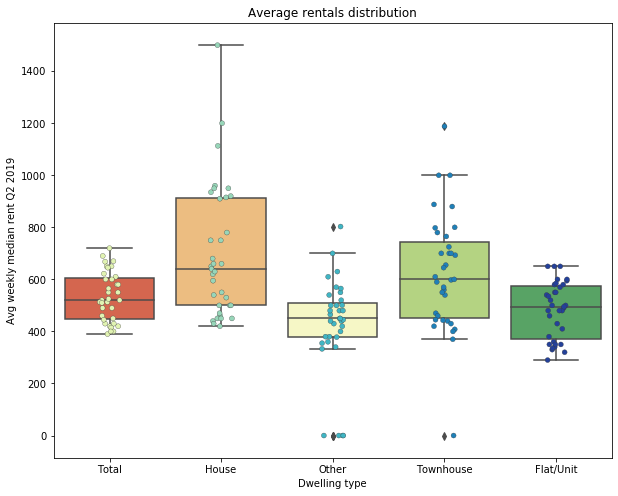

In [15]:
#Box plot to evaluate total Sydney's rental avg
#Syntax :
#seaborn.boxplot(x=None, y=None, hue=None, data=None, 
                #order=None, hue_order=None, orient=None,
                #color=None, palette=None, saturation=0.75, width=0.8, 
                #dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)

plt.figure(figsize=(10,8))
sns.boxplot(x='Dwelling_types', y='Avg_rent', hue=None, data=df_map1, 
            palette='RdYlGn')
sns.stripplot(x='Dwelling_types', y='Avg_rent', hue=None, data=df_map1, jitter=True, 
              split=True, linewidth=0.3, palette='YlGnBu')

#df_map1.boxplot(by ='Dwelling Types', column =['Avg rent'], figsize=(10, 6), grid = False)

plt.title('Average rentals distribution')
plt.xlabel('Dwelling type')
plt.ylabel('Avg weekly median rent Q2 2019')

In [16]:
#Create datafram fro bar plot and avg by rental and sum of propoerties--> by suburb

df_map_bar=df_map1[['neighbourhood','Avg_rent','Dwelling_types','Total properties']]


In [17]:
filterB=df_map_bar.Dwelling_types == "Total"
filterC=df_map_bar.neighbourhood != "Total"
df_map_bar1=df_map_bar[filterB&filterC]
df_map_bar2=df_map_bar1.sort_values(by='Avg_rent',ascending=False, na_position='first').reset_index()
df_map_bar2.drop(['index'], axis=1, inplace=True)
df_map_bar2

,neighbourhood,Avg_rent,Dwelling_types,Total properties
0,Woollahra,720,Total,8436
1,Waverley,690,Total,13790
2,Ku-Ring-Gai,670,Total,7655
3,Hunters Hill,668,Total,884
4,Sydney,650,Total,58452
5,Northern Beaches,650,Total,23804
6,Willoughby,645,Total,9011
7,North Sydney,622,Total,16481
8,Canada Bay,610,Total,11586
9,Randwick,600,Total,21194


In [18]:
df_map_bar2.shape

(34, 4)

In [19]:
mean=df_map_bar2['Avg_rent'].mean()
mean

534.4411764705883

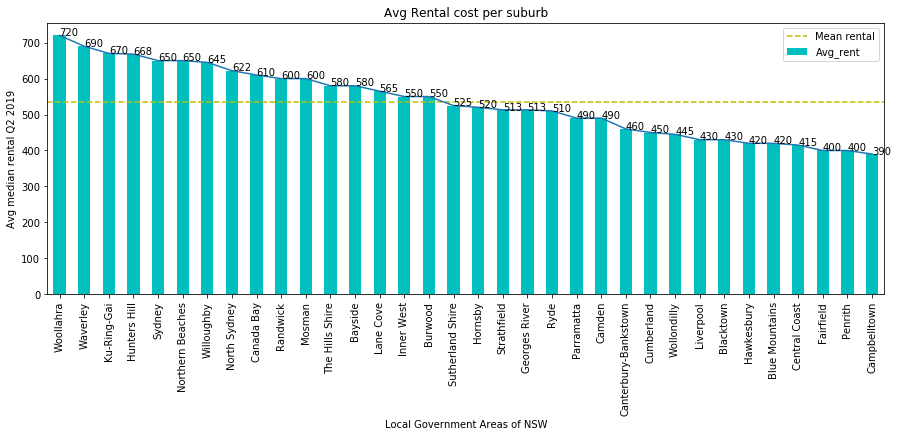

In [20]:
# Create bar chart on avg rent per suburb
df_map_bar2.plot(kind='bar', figsize=(15, 5), rot=90, x='neighbourhood', y='Avg_rent', facecolor='c') # rotate the bars by 90 degrees

plt.axhline(mean, color='y', linestyle='--', label='Mean rental')

plt.xlabel('Local Government Areas of NSW', size=10)
plt.ylabel('Avg median rental Q2 2019', size=10)
plt.title('Avg Rental cost per suburb')
plt.legend()

x=df_map_bar2['neighbourhood']
y=df_map_bar2['Avg_rent']

plt.plot(x,y)
for a,b in zip(x, y): 
    plt.text(a, b, str(b))
plt.show()

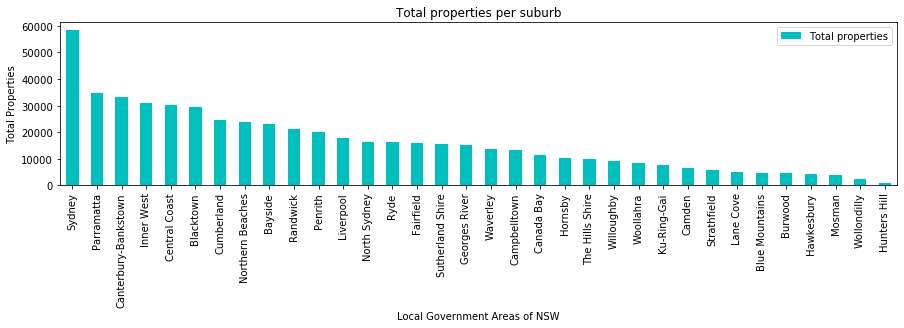

In [21]:
# Create bar chart on avg rent per suburb
df_map_bar3=df_map_bar2.sort_values(by='Total properties',ascending=False, na_position='first')
df_map_bar3.plot(kind='bar', figsize=(15, 3), rot=90, x='neighbourhood', y='Total properties', facecolor='c') # rotate the bars by 90 degrees


plt.xlabel('Local Government Areas of NSW', size=10)
plt.ylabel('Total Properties', size=10)
plt.title('Total properties per suburb')
plt.legend()

x=df_map_bar2['neighbourhood']
y=df_map_bar2['Total properties']

plt.show()

In [22]:
#Calling original data tocreate Implots
filtera=df.GMR == "Total"
filterb=df.Rings == "Total"
filterc=df.Greater_Sydney == "Greater Sydney"
all_filters1=filtera&filterb&filterc
df_implot=df[all_filters1]
df_implot.head()

,GMR,Greater_Sydney,Rings,neighbourhood,Dwelling_types,Bedroom_numbers,First Quartile Weekly Rent for New Bonds\n$,Avg_rent,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total properties,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
8213,Total,Greater Sydney,Total,Total,Total,Total,420,520,650,61348,547984,0,-0.028,0.1393,0.0904
8214,Total,Greater Sydney,Total,Total,Total,Bedsitter,325,390,470,1003,8096,-0.025,-0.025,0.2616,0.101
8215,Total,Greater Sydney,Total,Total,Total,1 Bedroom,390,475,560,12790,87880,-0.0104,-0.0306,0.1997,0.1242
8216,Total,Greater Sydney,Total,Total,Total,Not Specified,370,460,590,2130,41777,-0.0213,-0.0612,-0.027,-0.198
8217,Total,Greater Sydney,Total,Total,Total,2 Bedrooms,410,525,650,24646,215636,0.0096,-0.0278,0.1317,0.1182


In [23]:
df_implot1 = df_implot[df_implot['Dwelling_types'] != 'Total'] # filter at Dwelling types to remove Totals
df_implot2 = df_implot1[df_implot1['neighbourhood'] != 'Total'] # filter at neighbourhoods to remove Totals
df_implot3=df_implot2[df_implot2['Bedroom_numbers'] != 'Total'] # filter at Bedroom_numbers to remove Totals]
df_implot4=df_implot3.replace(to_replace =["s", "-"],  
                            value ="0")
df_implot4["Total properties"] = pd.to_numeric(df_implot4["Total properties"])
df_implot4["Avg_rent"] = pd.to_numeric(df_implot4["Avg_rent"])
df_implot4["Annual change in Median Weekly Rent"] = pd.to_numeric(df_implot4["Annual change in Median Weekly Rent"])

df_implot4.head()


,GMR,Greater_Sydney,Rings,neighbourhood,Dwelling_types,Bedroom_numbers,First Quartile Weekly Rent for New Bonds\n$,Avg_rent,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total properties,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
8256,Total,Greater Sydney,Total,Bayside,House,Bedsitter,0,0,0,0,0,0,0.0000,0,0
8257,Total,Greater Sydney,Total,Bayside,House,1 Bedroom,280,300,400,0,99,-0.3514,-0.4231,0.05,0.9091
8258,Total,Greater Sydney,Total,Bayside,House,Not Specified,0,0,0,0,118,0,0.0000,0,0
8259,Total,Greater Sydney,Total,Bayside,House,2 Bedrooms,460,520,610,79,738,0,-0.0545,0,0.2742
8260,Total,Greater Sydney,Total,Bayside,House,3 Bedrooms,590,660,720,175,1694,0.0154,-0.0149,0.2411,0.0355


In [24]:
df_implot5=df_implot4[['neighbourhood','Dwelling_types','Bedroom_numbers','Avg_rent','Total properties']]
df_implot6=df_implot5[df_implot5['Avg_rent'] != 0] # filter at Bedroom_numbers to remove Totals]

In [25]:
df_implot6.dtypes

neighbourhood       object
Dwelling_types      object
Bedroom_numbers     object
Avg_rent             int64
Total properties     int64
dtype: object

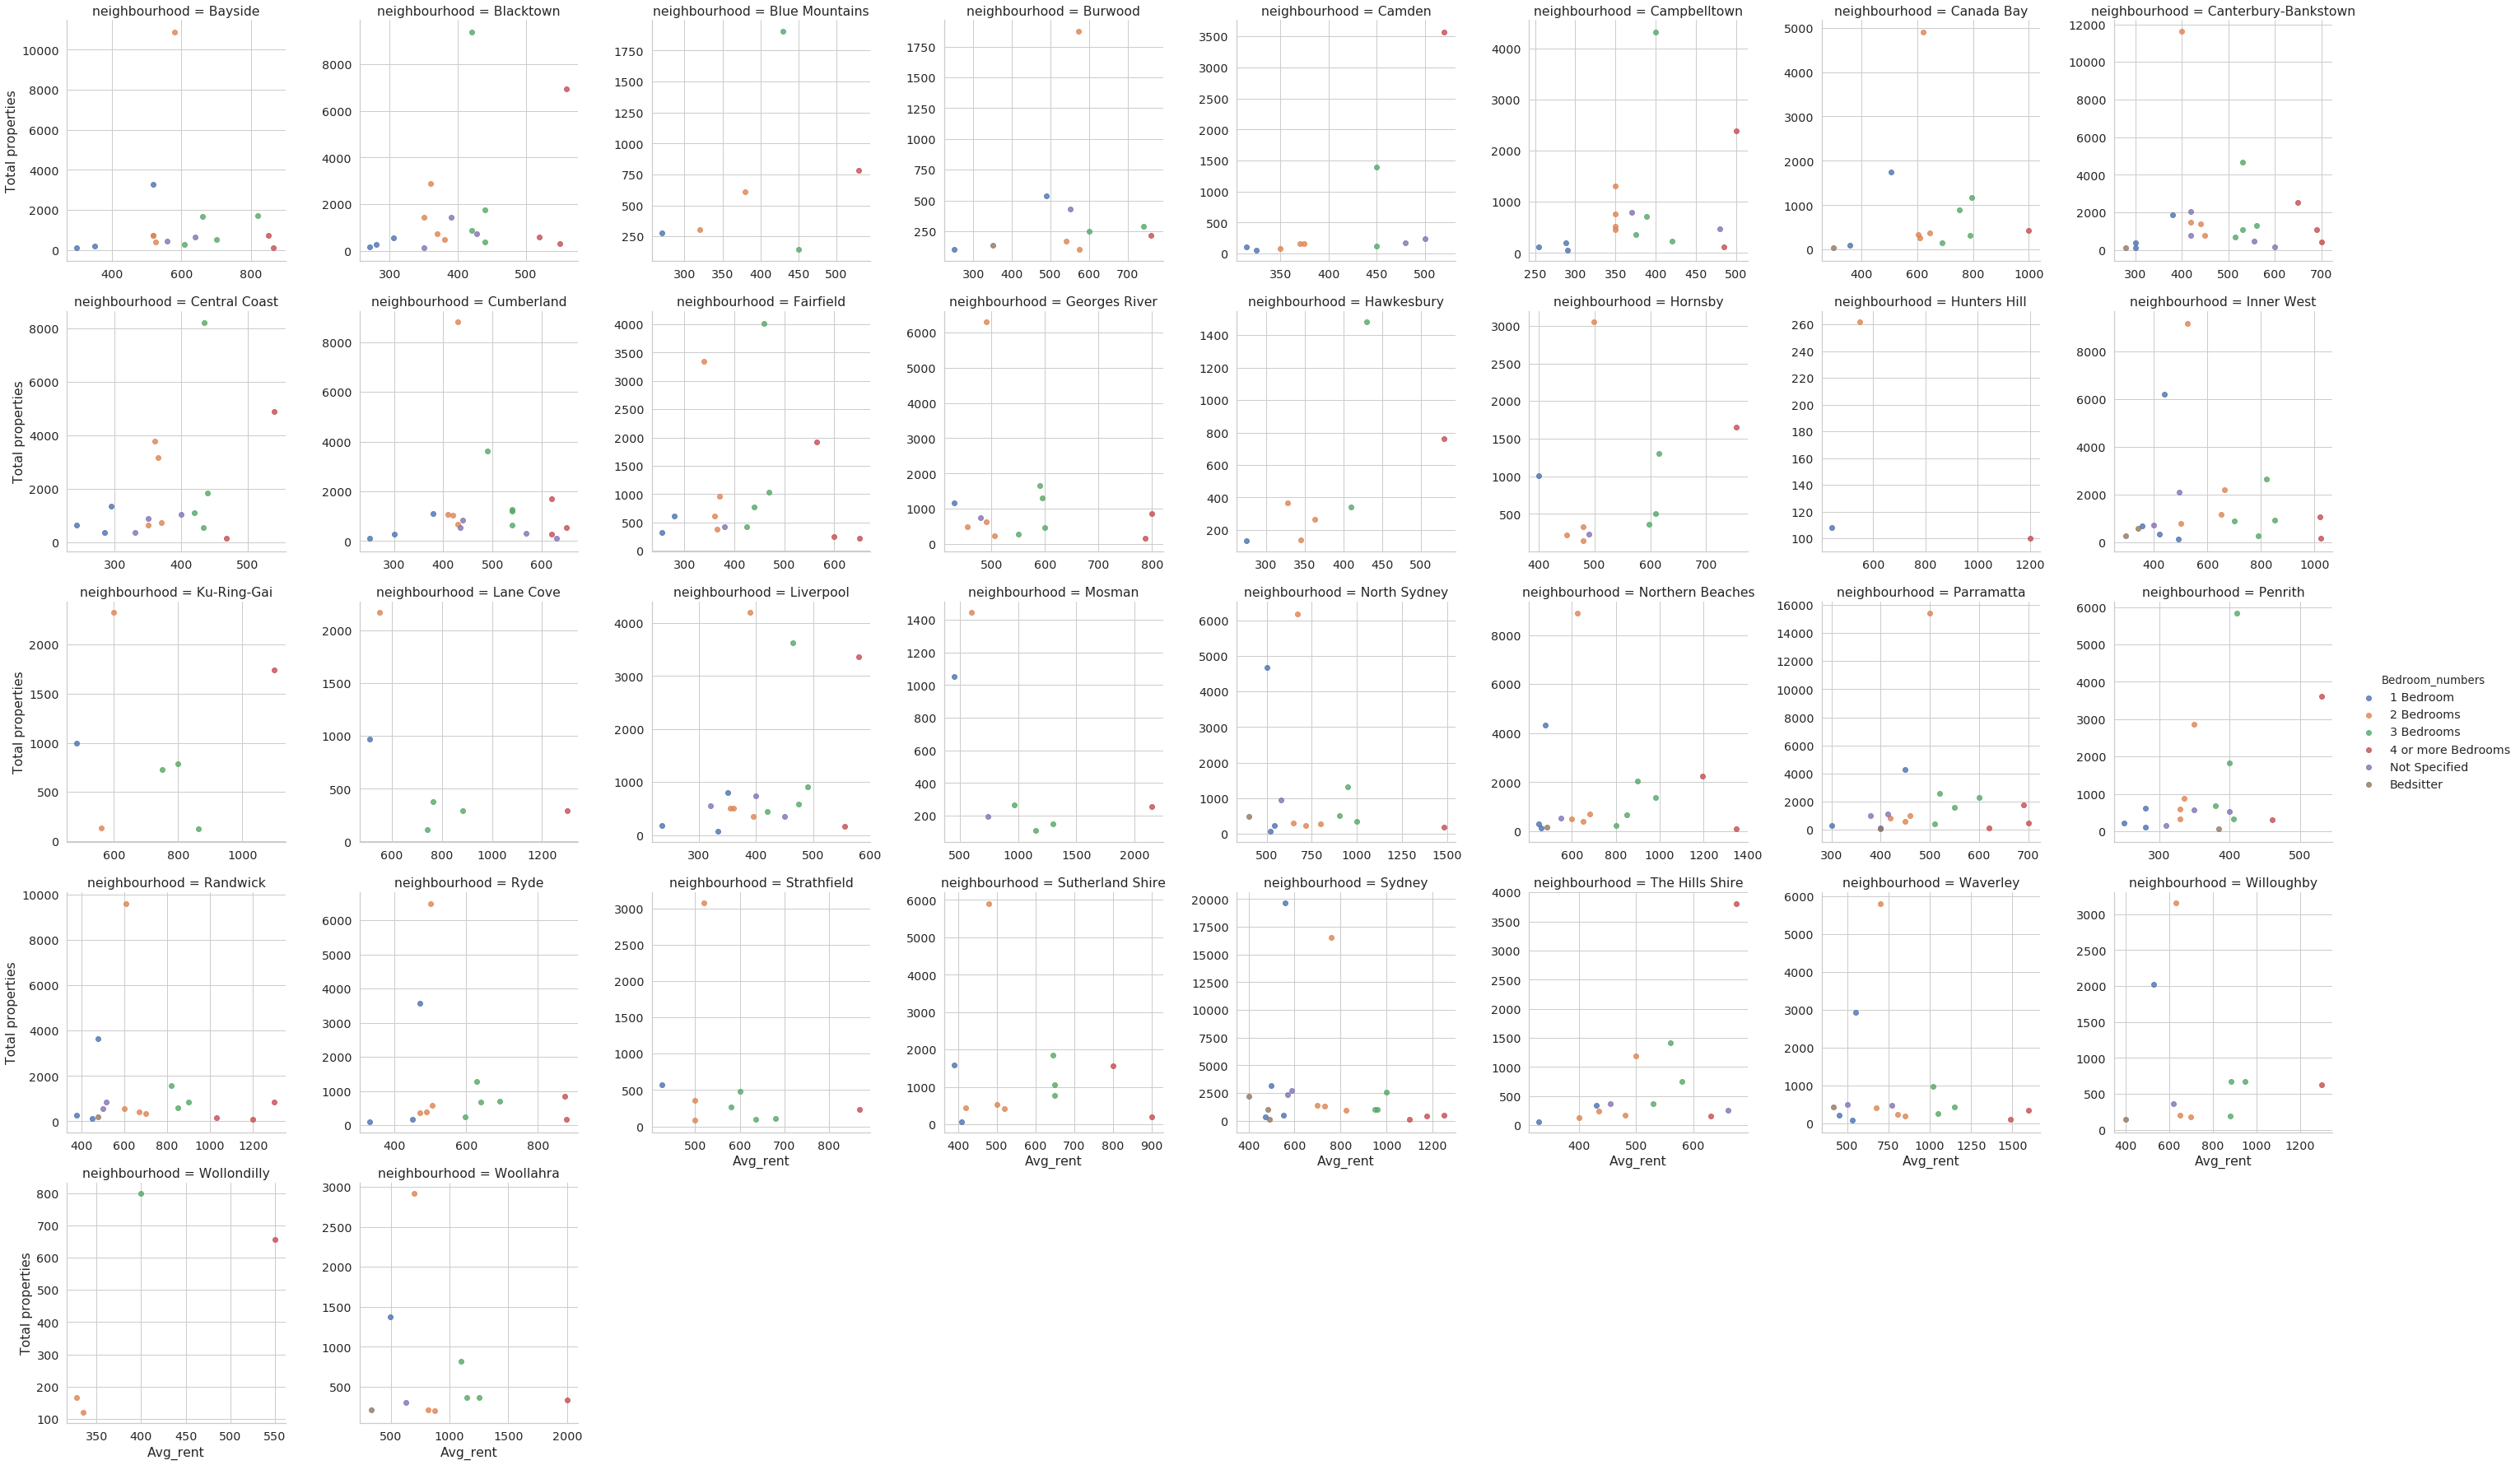

In [26]:
sns.set(style='whitegrid', palette="deep", font_scale=1.3)
sns.lmplot("Avg_rent", "Total properties", data=df_implot6, 
           fit_reg=False, hue='Bedroom_numbers', col='neighbourhood', col_wrap=8, sharex=False, sharey=False, legend_out=True)

In [27]:
#final dataframes
df_rental=df_map_bar2
df_rental

,neighbourhood,Avg_rent,Dwelling_types,Total properties
0,Woollahra,720,Total,8436
1,Waverley,690,Total,13790
2,Ku-Ring-Gai,670,Total,7655
3,Hunters Hill,668,Total,884
4,Sydney,650,Total,58452
5,Northern Beaches,650,Total,23804
6,Willoughby,645,Total,9011
7,North Sydney,622,Total,16481
8,Canada Bay,610,Total,11586
9,Randwick,600,Total,21194


In [28]:
#final dataframes
df_implot6.head()

,neighbourhood,Dwelling_types,Bedroom_numbers,Avg_rent,Total properties
8257,Bayside,House,1 Bedroom,300,99
8259,Bayside,House,2 Bedrooms,520,738
8260,Bayside,House,3 Bedrooms,660,1694
8261,Bayside,House,4 or more Bedrooms,850,738
8264,Bayside,Other,1 Bedroom,350,189


## Sales data

In [29]:
df_s= pd.read_excel('Sales.xlsx', sheet_name='LGA', skiprows=range(4))
df_s.head()

,GMR,Greater_Sydney,Rings,Local Government Areas (LGAs),Dwelling_types,First Quartile Sales Price\n$'000s,Median_price_$000,Third Quartile Sales Price\n'000s,Mean_price_$000s,Sales\nNo.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,Total,Total,Total,Total,Total,475,651,920,906,25870,0.0093,-0.0356,0.2522,-0.1587
1,Total,Total,Total,Total,Non Strata,458,650,950,830,17305,0.0156,-0.037,0.2068,-0.1455
2,Total,Total,Total,Total,Strata,500,655,865,1060,8565,0.0155,-0.0353,0.3554,-0.1842
3,Total,Total,Total,Albury,Total,233,301,393,321,210,-0.0768,-0.0306,0,-0.2784
4,Total,Total,Total,Albury,Non Strata,267,330,414,351,163,-0.0808,-0.0308,-0.0523,-0.2851


In [30]:
df_s.reset_index()

,index,GMR,Greater_Sydney,Rings,Local Government Areas (LGAs),Dwelling_types,First Quartile Sales Price\n$'000s,Median_price_$000,Third Quartile Sales Price\n'000s,Mean_price_$000s,Sales\nNo.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,0,Total,Total,Total,Total,Total,475,651,920,906,25870,0.0093,-0.0356,0.2522,-0.1587
1,1,Total,Total,Total,Total,Non Strata,458,650,950,830,17305,0.0156,-0.037,0.2068,-0.1455
2,2,Total,Total,Total,Total,Strata,500,655,865,1060,8565,0.0155,-0.0353,0.3554,-0.1842
3,3,Total,Total,Total,Albury,Total,233,301,393,321,210,-0.0768,-0.0306,0,-0.2784
4,4,Total,Total,Total,Albury,Non Strata,267,330,414,351,163,-0.0808,-0.0308,-0.0523,-0.2851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,2742,Rest of State,Rest of State,Rest of State,Wingecarribee,Non Strata,620,765,1060,880,193,-0.0408,-0.0473,0.3403,-0.1752
2743,2743,Rest of State,Rest of State,Rest of State,Wingecarribee,Strata,501,550,641,585,s,0.0377,-0.1406,0.6923,-0.1852
2744,2744,Rest of State,Rest of State,Rest of State,Yass Valley,Total,400,600,845,653,65,-0.0926,0.1517,0.5476,0.0833
2745,2745,Rest of State,Rest of State,Rest of State,Yass Valley,Non Strata,400,605,848,662,63,-0.0851,0.1592,0.5,0.0678


In [31]:
df_s.columns

Index(['GMR', 'Greater_Sydney', 'Rings', 'Local Government Areas (LGAs)',
       'Dwelling_types', 'First Quartile Sales Price\n$'000s',
       'Median_price_$000', 'Third Quartile Sales Price\n'000s',
       'Mean_price_$000s', 'Sales\nNo.', 'Qtly change in Median',
       'Annual change in Median', 'Qtly change in Count',
       'Annual change in Count'],
      dtype='object')

In [32]:
df_s1 = df_s[df_s['GMR'] == 'Total'] # filter at GMR to keep Totals
df_s1 = df_s[df_s['Rings'] == 'Total'] # filter at GMR to keep Totals
df_s2 = df_s1[df_s1['Greater_Sydney'] == 'Greater Sydney'] # filter to keep Totals
df_s3 = df_s2[df_s2['Dwelling_types'] == 'Total'] # filter to keep Totals
df_s4=df_s3.replace(to_replace =["s", "-"],  
                            value ="0")
df_s4["Median_price_$000"] = pd.to_numeric(df_s4["Median_price_$000"])
df_s4["Mean_price_$000s"] = pd.to_numeric(df_s4["Mean_price_$000s"])
df_s4["Sales\nNo."] = pd.to_numeric(df_s4["Sales\nNo."])

df_s4.head()

,GMR,Greater_Sydney,Rings,Local Government Areas (LGAs),Dwelling_types,First Quartile Sales Price\n$'000s,Median_price_$000,Third Quartile Sales Price\n'000s,Mean_price_$000s,Sales\nNo.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
683,Total,Greater Sydney,Total,Total,Total,620,791,1170,1174,15602,0.0076,-0.0583,0.3253,-0.1322
686,Total,Greater Sydney,Total,Bayside,Total,635,795,1040,856,616,0.0325,-0.0647,0.5439,-0.0737
689,Total,Greater Sydney,Total,Blacktown,Total,570,660,799,679,897,0.0185,-0.0571,0.2545,-0.0695
692,Total,Greater Sydney,Total,Blue Mountains,Total,545,640,748,665,295,-0.0106,-0.0293,0.2140,-0.1474
695,Total,Greater Sydney,Total,Burwood,Total,620,830,1026,920,101,0.0641,-0.0525,0.8036,-0.0648


In [33]:
df_s4.dtypes

GMR                                    object
Greater_Sydney                         object
Rings                                  object
Local Government Areas (LGAs)          object
Dwelling_types                         object
First Quartile Sales Price\n$'000s      int64
Median_price_$000                       int64
Third Quartile Sales Price\n'000s       int64
Mean_price_$000s                        int64
Sales\nNo.                              int64
Qtly change in Median                 float64
Annual change in Median               float64
Qtly change in Count                  float64
Annual change in Count                float64
dtype: object

In [34]:
df_s4.shape

(70, 14)

In [35]:
df_s4.rename(columns = {'Median_price_$000':'Median_price_$000s','Sales\nNo.':
                     'No_of_sales','Local Government Areas (LGAs)':'neighbourhood'}, inplace = True)

In [36]:
df_s5=df_s4[['neighbourhood','Dwelling_types','Median_price_$000s','Mean_price_$000s','No_of_sales']]
df_s6 = df_s5[df_s4['Dwelling_types'] == 'Total'] # filter to keep Totals
#df_implot6=df_implot5[df_implot5['Avg_rent'] != 0] # filter at Bedroom_numbers to remove Totals]
df_s6.reset_index()

,index,neighbourhood,Dwelling_types,Median_price_$000s,Mean_price_$000s,No_of_sales
0,683,Total,Total,791,1174,15602
1,686,Bayside,Total,795,856,616
2,689,Blacktown,Total,660,679,897
3,692,Blue Mountains,Total,640,665,295
4,695,Burwood,Total,830,920,101
...,...,...,...,...,...,...
65,1730,The Hills Shire,Total,1078,1161,471
66,1733,Waverley,Total,1318,1739,266
67,1736,Willoughby,Total,1688,2236,250
68,1739,Wollondilly,Total,663,726,116


In [37]:
df_sale=pd.read_csv(r'Sale_final.csv')
df_sale.head()

,neighbourhood,Dwelling_types,Median_price_$000s,Mean_price_$000s,No_of_sales
0,Total,Total,791,1174,15602
1,Bayside,Total,795,856,616
2,Blacktown,Total,660,679,897
3,Blue Mountains,Total,640,665,295
4,Burwood,Total,830,920,101


In [38]:
df_sale1=df_sale[df_sale['neighbourhood'] != 'Total']

In [39]:
df_sale1.shape

(34, 5)

In [40]:
df_map_bar2.shape

(34, 4)

[Text(0, 0, 'Bayside'),
 Text(0, 0, 'Blacktown'),
 Text(0, 0, 'Blue Mountains'),
 Text(0, 0, 'Burwood'),
 Text(0, 0, 'Camden'),
 Text(0, 0, 'Campbelltown'),
 Text(0, 0, 'Canada Bay'),
 Text(0, 0, 'Canterbury-Bankstown'),
 Text(0, 0, 'Central Coast'),
 Text(0, 0, 'Cumberland'),
 Text(0, 0, 'Fairfield'),
 Text(0, 0, 'Georges River'),
 Text(0, 0, 'Hawkesbury'),
 Text(0, 0, 'Hornsby'),
 Text(0, 0, 'Hunters Hill'),
 Text(0, 0, 'Inner West'),
 Text(0, 0, 'Ku-Ring-Gai'),
 Text(0, 0, 'Lane Cove'),
 Text(0, 0, 'Liverpool'),
 Text(0, 0, 'Mosman'),
 Text(0, 0, 'North Sydney'),
 Text(0, 0, 'Northern Beaches'),
 Text(0, 0, 'Parramatta'),
 Text(0, 0, 'Penrith'),
 Text(0, 0, 'Randwick'),
 Text(0, 0, 'Ryde'),
 Text(0, 0, 'Strathfield'),
 Text(0, 0, 'Sutherland Shire'),
 Text(0, 0, 'Sydney'),
 Text(0, 0, 'The Hills Shire'),
 Text(0, 0, 'Waverley'),
 Text(0, 0, 'Willoughby'),
 Text(0, 0, 'Wollondilly'),
 Text(0, 0, 'Woollahra')]

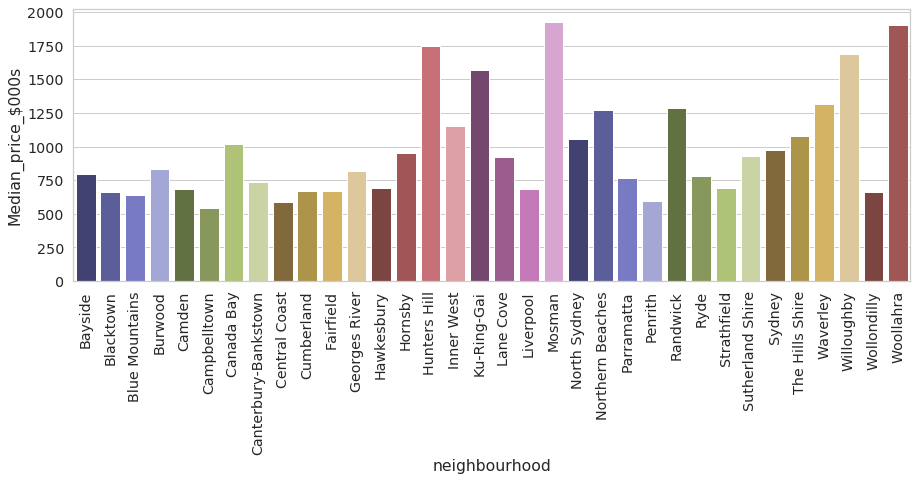

In [41]:
# Create bar chart on avg rent per suburb
plt.figure(figsize=(15,5))
sns.set(style='whitegrid', palette="Pastel1", font_scale=1.3)

chart=sns.barplot(x='neighbourhood', y='Median_price_$000s', hue=None, data=df_sale1, order=None, 
            hue_order=None, color=None, palette='tab20b', saturation=0.75 ,errcolor='.26', errwidth=None, capsize=None, dodge=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [42]:
#combine sale with rental data
df_sr= pd.merge(df_rental, df_sale1, on='neighbourhood', how='outer')

df_sr

,neighbourhood,Avg_rent,Dwelling_types_x,Total properties,Dwelling_types_y,Median_price_$000s,Mean_price_$000s,No_of_sales
0,Woollahra,720,Total,8436,Total,1904,2594,240
1,Waverley,690,Total,13790,Total,1318,1739,266
2,Ku-Ring-Gai,670,Total,7655,Total,1570,1675,427
3,Hunters Hill,668,Total,884,Total,1750,2117,0
4,Sydney,650,Total,58452,Total,971,1116,895
5,Northern Beaches,650,Total,23804,Total,1275,1375,933
6,Willoughby,645,Total,9011,Total,1688,2236,250
7,North Sydney,622,Total,16481,Total,1060,1482,315
8,Canada Bay,610,Total,11586,Total,1018,1207,319
9,Randwick,600,Total,21194,Total,1284,1380,351


In [43]:
df_sr.drop('Dwelling_types_x', axis=1, inplace=True)
df_sr.drop('Dwelling_types_y', axis=1, inplace=True)
df_sr.head()

,neighbourhood,Avg_rent,Total properties,Median_price_$000s,Mean_price_$000s,No_of_sales
0,Woollahra,720,8436,1904,2594,240
1,Waverley,690,13790,1318,1739,266
2,Ku-Ring-Gai,670,7655,1570,1675,427
3,Hunters Hill,668,884,1750,2117,0
4,Sydney,650,58452,971,1116,895


In [44]:
df_heat1=df_implot6.reset_index()
df_heat1.drop(['index'], axis=1, inplace=True)

In [45]:
df_heat1.head()

,neighbourhood,Dwelling_types,Bedroom_numbers,Avg_rent,Total properties
0,Bayside,House,1 Bedroom,300,99
1,Bayside,House,2 Bedrooms,520,738
2,Bayside,House,3 Bedrooms,660,1694
3,Bayside,House,4 or more Bedrooms,850,738
4,Bayside,Other,1 Bedroom,350,189


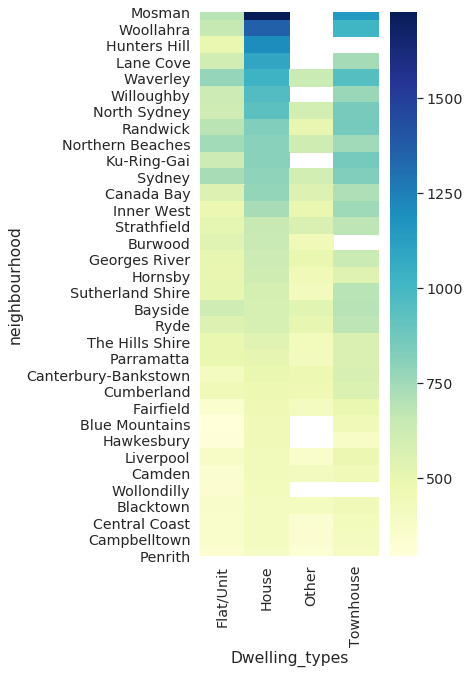

In [46]:
heatmap1_data = pd.pivot_table(df_heat1,values='Avg_rent', index=['neighbourhood'], columns='Dwelling_types')
hm=heatmap1_data.sort_values(["House", "Flat/Unit", "Other", "Townhouse"], ascending = (False, False,False,False))
plt.figure(figsize=(4,10))
sns.heatmap(hm, cmap="YlGnBu")

In [47]:
#Combined dataframe of Rental and Sales
df_sr.head()

,neighbourhood,Avg_rent,Total properties,Median_price_$000s,Mean_price_$000s,No_of_sales
0,Woollahra,720,8436,1904,2594,240
1,Waverley,690,13790,1318,1739,266
2,Ku-Ring-Gai,670,7655,1570,1675,427
3,Hunters Hill,668,884,1750,2117,0
4,Sydney,650,58452,971,1116,895


array([[1.        , 0.84202694],
       [0.84202694, 1.        ]])

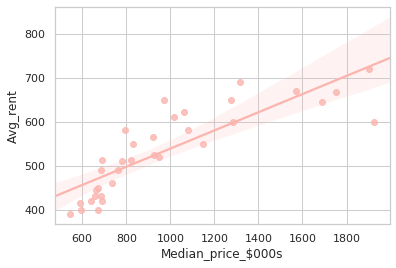

In [48]:
#scatter plots
sns.set(style='whitegrid', palette="Pastel1", font_scale=1)
ax = sns.regplot(x="Median_price_$000s", y="Avg_rent",
                     data=df_sr)
x=df_sr['Median_price_$000s']
y=df_sr['Avg_rent']
np.corrcoef(x,y)

array([[ 1.        , -0.06340738],
       [-0.06340738,  1.        ]])

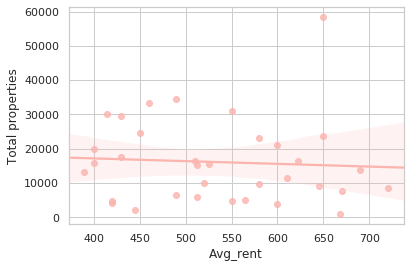

In [49]:
sns.set(style='whitegrid', palette="Pastel1", font_scale=1)
sns.regplot(x="Avg_rent", y="Total properties",
                     data=df_sr)
x=df_sr['Avg_rent']
y=df_sr['Total properties']
np.corrcoef(x,y)

## Population data

In [50]:
df_p= pd.read_excel('Population_stats1.xlsx',index=False)
df_p.head()

,neighbourhood,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Bayside,129075,129377,130598,131144,132112,133205,135831,139556,142527,144295,144985,148028,151309,154980,159222,164534
1,Blacktown,263103,267048,268806,271434,275206,278894,284925,292002,299450,306601,312346,317735,324797,331825,339449,348030
2,Blue Mountains,76528,76656,76651,76436,75971,75600,76198,77102,77869,78227,78553,78532,78705,78867,78889,78835
3,Burwood,30393,30682,30980,31370,31696,32199,32893,33343,33708,33835,34176,35095,36145,37200,37822,38536
4,Camden,45163,47172,48441,48925,49990,50628,52178,53736,55377,56846,58439,61127,64093,68642,74100,80264


In [51]:
df_p.dtypes

neighbourhood    object
2001              int64
2002              int64
2003              int64
2004              int64
2005              int64
2006              int64
2007              int64
2008              int64
2009              int64
2010              int64
2011              int64
2012              int64
2013              int64
2014              int64
2015              int64
2016              int64
dtype: object

In [52]:
df_p.columns

Index(['neighbourhood',            2001,            2002,            2003,
                  2004,            2005,            2006,            2007,
                  2008,            2009,            2010,            2011,
                  2012,            2013,            2014,            2015,
                  2016],
      dtype='object')

In [53]:
df_p.columns=['neighbourhood', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013', '2014', '2015', '2016']

In [54]:
df_p.columns

Index(['neighbourhood', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [55]:
df_p.head()

,neighbourhood,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Bayside,129075,129377,130598,131144,132112,133205,135831,139556,142527,144295,144985,148028,151309,154980,159222,164534
1,Blacktown,263103,267048,268806,271434,275206,278894,284925,292002,299450,306601,312346,317735,324797,331825,339449,348030
2,Blue Mountains,76528,76656,76651,76436,75971,75600,76198,77102,77869,78227,78553,78532,78705,78867,78889,78835
3,Burwood,30393,30682,30980,31370,31696,32199,32893,33343,33708,33835,34176,35095,36145,37200,37822,38536
4,Camden,45163,47172,48441,48925,49990,50628,52178,53736,55377,56846,58439,61127,64093,68642,74100,80264


In [56]:
df_p.shape

(34, 17)

In [57]:
#remove default index and rest to neighbourhood
df_p.set_index('neighbourhood',inplace=True)


In [58]:
df_p.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
neighbourhood,,,,,,,,,,,,,,,,
Bayside,129075,129377,130598,131144,132112,133205,135831,139556,142527,144295,144985,148028,151309,154980,159222,164534
Blacktown,263103,267048,268806,271434,275206,278894,284925,292002,299450,306601,312346,317735,324797,331825,339449,348030
Blue Mountains,76528,76656,76651,76436,75971,75600,76198,77102,77869,78227,78553,78532,78705,78867,78889,78835
Burwood,30393,30682,30980,31370,31696,32199,32893,33343,33708,33835,34176,35095,36145,37200,37822,38536
Camden,45163,47172,48441,48925,49990,50628,52178,53736,55377,56846,58439,61127,64093,68642,74100,80264


In [59]:
#transpose data
df_trend=df_p.transpose()
df_trend.head()

neighbourhood,Bayside,Blacktown,Blue Mountains,Burwood,Camden,Campbelltown,Canada Bay,Canterbury-Bankstown,Central Coast,Cumberland,...,Randwick,Ryde,Strathfield,Sutherland Shire,Sydney,The Hills Shire,Waverley,Willoughby,Wollondilly,Woollahra
2001,129075,263103,76528,30393,45163,149192,61940,307592,294596,171200,...,124456,98516,29253,212458,128901,117301,62853,61399,38178,52677
2002,129377,267048,76656,30682,47172,149100,63077,307011,297530,171580,...,124390,98711,29578,212978,136368,122269,62832,62785,38513,52792
2003,130598,268806,76651,30980,48441,148743,64060,306316,299319,172359,...,124252,98929,30256,212719,145079,126698,62778,63389,39215,52998
2004,131144,271434,76436,31370,48925,147587,65350,305670,299999,174036,...,124088,99089,31242,211907,152892,130134,62988,64414,39830,52723
2005,132112,275206,75971,31696,49990,147220,66951,307118,301403,177098,...,124596,99527,32143,211460,158834,133214,63435,65578,40411,52655


In [60]:
df_trend.shape

(16, 34)

In [61]:
df_trend.columns

Index(['Bayside', 'Blacktown', 'Blue Mountains', 'Burwood', 'Camden',
       'Campbelltown', 'Canada Bay', 'Canterbury-Bankstown', 'Central Coast',
       'Cumberland', 'Fairfield', 'Georges River', 'Hawkesbury', 'Hornsby',
       'Hunters Hill', 'Inner West', 'Ku-ring-gai', 'Lane Cove', 'Liverpool',
       'Mosman', 'North Sydney', 'Northern Beaches', 'Parramatta', 'Penrith',
       'Randwick', 'Ryde', 'Strathfield', 'Sutherland Shire', 'Sydney',
       'The Hills Shire', 'Waverley', 'Willoughby', 'Wollondilly',
       'Woollahra'],
      dtype='object', name='neighbourhood')

## Geospatial analysis

In [62]:
syd = "data_cap/neighbourhoods.shp"
syd = gpd.read_file(syd)
syd.drop(['neighbou_1'], axis=1, inplace=True)
syd.rename(columns = {'neighbourh':'neighbourhood'}, inplace = True)
# check the GeoDataframe
syd.head()

,neighbourhood,geometry
0,Pittwater,"POLYGON ((151.30861 -33.70369, 151.30826 -33.7..."
1,Randwick,"POLYGON ((151.24087 -33.88992, 151.24143 -33.8..."
2,Waverley,"POLYGON ((151.27069 -33.91100, 151.27067 -33.9..."
3,Warringah,"POLYGON ((151.30861 -33.70369, 151.30743 -33.7..."
4,Lane Cove,"POLYGON ((151.19499 -33.82333, 151.19538 -33.8..."


In [63]:
print(list(syd['neighbourhood']))

['Pittwater', 'Randwick', 'Waverley', 'Warringah', 'Lane Cove', 'North Sydney', 'Bankstown', 'Canterbury', 'Strathfield', 'Auburn', 'The Hills Shire', 'Hunters Hill', 'Sydney', 'Botany Bay', 'Hurstville', 'Fairfield', 'Blacktown', 'Holroyd', 'Ashfield', 'Marrickville', 'Sutherland Shire', 'Rockdale', 'City Of Kogarah', 'Parramatta', 'Ryde', 'Leichhardt', 'Hornsby', 'Ku-Ring-Gai', 'Willoughby', 'Liverpool', 'Penrith', 'Canada Bay', 'Camden', 'Campbelltown', 'Mosman', 'Manly', 'Woollahra', 'Burwood']


In [64]:
syd.shape

(38, 2)

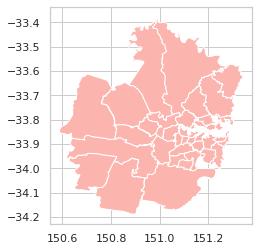

In [65]:
syd.plot()

In [66]:
syd_geo=syd
syd_geo

,neighbourhood,geometry
0,Pittwater,"POLYGON ((151.30861 -33.70369, 151.30826 -33.7..."
1,Randwick,"POLYGON ((151.24087 -33.88992, 151.24143 -33.8..."
2,Waverley,"POLYGON ((151.27069 -33.91100, 151.27067 -33.9..."
3,Warringah,"POLYGON ((151.30861 -33.70369, 151.30743 -33.7..."
4,Lane Cove,"POLYGON ((151.19499 -33.82333, 151.19538 -33.8..."
5,North Sydney,"POLYGON ((151.22002 -33.81771, 151.21999 -33.8..."
6,Bankstown,"POLYGON ((151.05858 -33.88428, 151.05855 -33.8..."
7,Canterbury,"POLYGON ((151.12851 -33.90478, 151.12867 -33.9..."
8,Strathfield,"POLYGON ((151.09460 -33.87148, 151.09449 -33.8..."
9,Auburn,"POLYGON ((151.08053 -33.83941, 151.08019 -33.8..."


### converting syd shape file to new LGAs

In [67]:
syd_geo.shape

(38, 2)

In [68]:
syd1=syd_geo.replace(to_replace =["Ashfield", "Leichhardt","Marrickville"],  
                            value ="Inner West")
syd2=syd1.replace(to_replace =["Bankstown", "Canterbury"],  
                            value ="Canterbury-Bankstown")
syd3=syd2.replace(to_replace =["Auburn", "Holroyd"],  
                            value ="Cumberland")
syd4=syd3.replace(to_replace =["Manly", "Pittwater","Warringah"],  
                            value ="Northern Beaches")
syd5=syd4.replace(to_replace =["City Of Kogarah", "Hurstville"],  
                            value ="Georges River")
syd6=syd5.replace(to_replace =["Botany Bay", "Rockdale"],  
                            value ="Bayside")
syd6.shape

(38, 2)

In [69]:
syd6.head()

,neighbourhood,geometry
0,Northern Beaches,"POLYGON ((151.30861 -33.70369, 151.30826 -33.7..."
1,Randwick,"POLYGON ((151.24087 -33.88992, 151.24143 -33.8..."
2,Waverley,"POLYGON ((151.27069 -33.91100, 151.27067 -33.9..."
3,Northern Beaches,"POLYGON ((151.30861 -33.70369, 151.30743 -33.7..."
4,Lane Cove,"POLYGON ((151.19499 -33.82333, 151.19538 -33.8..."


In [70]:
#Join shape file with population data
df_shape_pop = pd.merge(syd6, df_p, on='neighbourhood', how='outer')

df_shape_pop.shape

(43, 18)

In [71]:
#join above with sale rental data
df_joined = pd.merge(df_shape_pop, df_sr, on='neighbourhood', how='outer')
df_joined.shape

(43, 23)

In [72]:
df_joined.head()

,neighbourhood,geometry,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,Avg_rent,Total properties,Median_price_$000s,Mean_price_$000s,No_of_sales
0,Northern Beaches,"POLYGON ((151.30861 -33.70369, 151.30826 -33.7...",229816.0,230170.0,230208.0,230438.0,231741.0,233600.0,237084.0,239842.0,...,254115.0,257020.0,259723.0,262593.0,265468.0,650.0,23804.0,1275.0,1375.0,933.0
1,Northern Beaches,"POLYGON ((151.30861 -33.70369, 151.30743 -33.7...",229816.0,230170.0,230208.0,230438.0,231741.0,233600.0,237084.0,239842.0,...,254115.0,257020.0,259723.0,262593.0,265468.0,650.0,23804.0,1275.0,1375.0,933.0
2,Northern Beaches,"POLYGON ((151.28965 -33.78650, 151.28943 -33.7...",229816.0,230170.0,230208.0,230438.0,231741.0,233600.0,237084.0,239842.0,...,254115.0,257020.0,259723.0,262593.0,265468.0,650.0,23804.0,1275.0,1375.0,933.0
3,Randwick,"POLYGON ((151.24087 -33.88992, 151.24143 -33.8...",124456.0,124390.0,124252.0,124088.0,124596.0,125346.0,128229.0,131136.0,...,139836.0,142459.0,144814.0,146908.0,148922.0,600.0,21194.0,1284.0,1380.0,351.0
4,Waverley,"POLYGON ((151.27069 -33.91100, 151.27067 -33.9...",62853.0,62832.0,62778.0,62988.0,63435.0,64294.0,65279.0,66458.0,...,69294.0,70052.0,70742.0,71336.0,72013.0,690.0,13790.0,1318.0,1739.0,266.0


In [73]:
df_final=df_joined.drop(df_joined.index[[38,39,40,41,42]])
df_final.shape

(38, 23)

In [74]:
df_final.head()

,neighbourhood,geometry,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,Avg_rent,Total properties,Median_price_$000s,Mean_price_$000s,No_of_sales
0,Northern Beaches,"POLYGON ((151.30861 -33.70369, 151.30826 -33.7...",229816.0,230170.0,230208.0,230438.0,231741.0,233600.0,237084.0,239842.0,...,254115.0,257020.0,259723.0,262593.0,265468.0,650.0,23804.0,1275.0,1375.0,933.0
1,Northern Beaches,"POLYGON ((151.30861 -33.70369, 151.30743 -33.7...",229816.0,230170.0,230208.0,230438.0,231741.0,233600.0,237084.0,239842.0,...,254115.0,257020.0,259723.0,262593.0,265468.0,650.0,23804.0,1275.0,1375.0,933.0
2,Northern Beaches,"POLYGON ((151.28965 -33.78650, 151.28943 -33.7...",229816.0,230170.0,230208.0,230438.0,231741.0,233600.0,237084.0,239842.0,...,254115.0,257020.0,259723.0,262593.0,265468.0,650.0,23804.0,1275.0,1375.0,933.0
3,Randwick,"POLYGON ((151.24087 -33.88992, 151.24143 -33.8...",124456.0,124390.0,124252.0,124088.0,124596.0,125346.0,128229.0,131136.0,...,139836.0,142459.0,144814.0,146908.0,148922.0,600.0,21194.0,1284.0,1380.0,351.0
4,Waverley,"POLYGON ((151.27069 -33.91100, 151.27067 -33.9...",62853.0,62832.0,62778.0,62988.0,63435.0,64294.0,65279.0,66458.0,...,69294.0,70052.0,70742.0,71336.0,72013.0,690.0,13790.0,1318.0,1739.0,266.0


In [75]:
#to get centre point from df_final geometry to plot choropleth annoataations of neighbourhoods and also get Lat/Long
df_final["center"] = df_final["geometry"].centroid
df_points = df_final.copy()
df_points.set_geometry("center", inplace = True)
df_points.head()


,neighbourhood,geometry,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,Avg_rent,Total properties,Median_price_$000s,Mean_price_$000s,No_of_sales,center
0,Northern Beaches,"POLYGON ((151.30861 -33.70369, 151.30826 -33.7...",229816.0,230170.0,230208.0,230438.0,231741.0,233600.0,237084.0,239842.0,...,257020.0,259723.0,262593.0,265468.0,650.0,23804.0,1275.0,1375.0,933.0,POINT (151.28355 -33.63669)
1,Northern Beaches,"POLYGON ((151.30861 -33.70369, 151.30743 -33.7...",229816.0,230170.0,230208.0,230438.0,231741.0,233600.0,237084.0,239842.0,...,257020.0,259723.0,262593.0,265468.0,650.0,23804.0,1275.0,1375.0,933.0,POINT (151.23075 -33.71085)
2,Northern Beaches,"POLYGON ((151.28965 -33.78650, 151.28943 -33.7...",229816.0,230170.0,230208.0,230438.0,231741.0,233600.0,237084.0,239842.0,...,257020.0,259723.0,262593.0,265468.0,650.0,23804.0,1275.0,1375.0,933.0,POINT (151.27134 -33.79973)
3,Randwick,"POLYGON ((151.24087 -33.88992, 151.24143 -33.8...",124456.0,124390.0,124252.0,124088.0,124596.0,125346.0,128229.0,131136.0,...,142459.0,144814.0,146908.0,148922.0,600.0,21194.0,1284.0,1380.0,351.0,POINT (151.23997 -33.94392)
4,Waverley,"POLYGON ((151.27069 -33.91100, 151.27067 -33.9...",62853.0,62832.0,62778.0,62988.0,63435.0,64294.0,65279.0,66458.0,...,70052.0,70742.0,71336.0,72013.0,690.0,13790.0,1318.0,1739.0,266.0,POINT (151.26694 -33.88989)


In [76]:
df_points['long'] = df_points.center.x
df_points['lat'] = df_points.center.y

In [77]:
#Final database for longitude and latitude
df_points.nunique()

neighbourhood         30
geometry              38
2001                  29
2002                  29
2003                  29
2004                  29
2005                  29
2006                  29
2007                  29
2008                  29
2009                  29
2010                  29
2011                  29
2012                  29
2013                  29
2014                  29
2015                  29
2016                  29
Avg_rent              22
Total properties      30
Median_price_$000s    29
Mean_price_$000s      30
No_of_sales           28
center                38
long                  38
lat                   38
dtype: int64

8

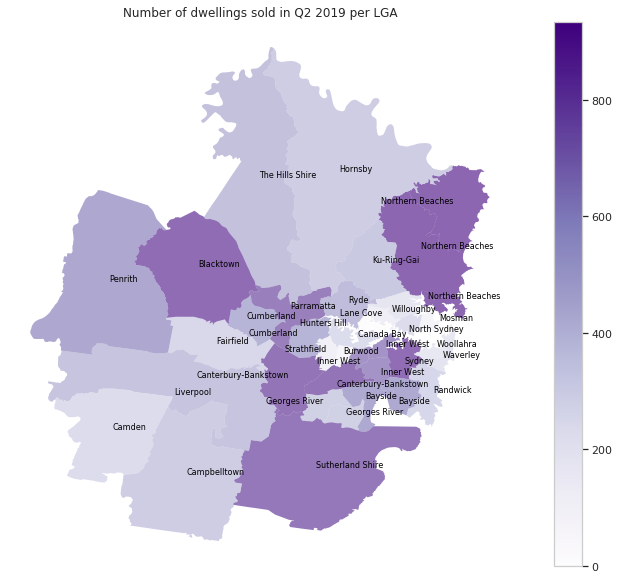

In [78]:
fig, ax = plt.subplots(figsize=(15,10))
img1=df_final.plot(column='No_of_sales', cmap ='Purples',
                   legend = True, ax=ax, linewidth=0, edgecolor='white', alpha=0.6) 
plt.axis('off')
plt.title('Number of dwellings sold in Q2 2019 per LGA', size =12)

texts = []

#labeling of LGAs
for x, y, label in zip(df_points.geometry.x, df_points.geometry.y, df_points["neighbourhood"]):
    texts.append(plt.text(x, y, label, fontsize = 8, color='black'))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="->", color='grey', lw=0))



8

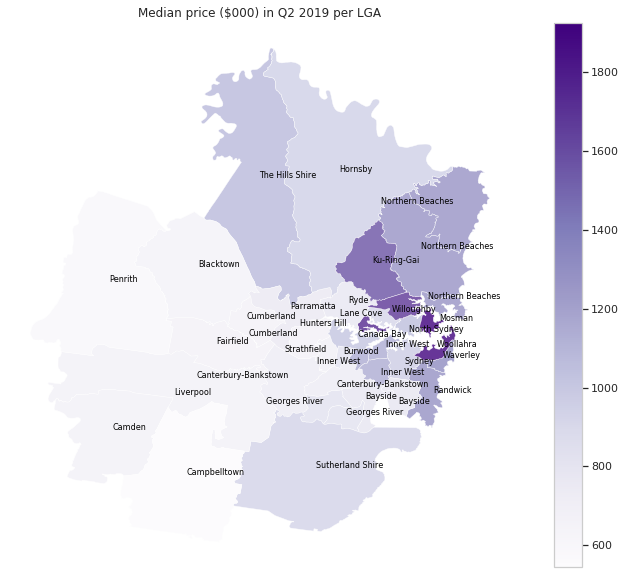

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
img1=df_final.plot(column='Median_price_$000s', cmap ='Purples',
                   legend = True, ax=ax, linewidth=0.5, edgecolor='white', alpha=.8) 
plt.axis('off')
plt.title('Median price ($000) in Q2 2019 per LGA', size =12)


texts = []

#labeling of LGAs
for x, y, label in zip(df_points.geometry.x, df_points.geometry.y, df_points["neighbourhood"]):
    texts.append(plt.text(x, y, label, fontsize = 8, color='black'))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="->", color='grey', lw=0))

8

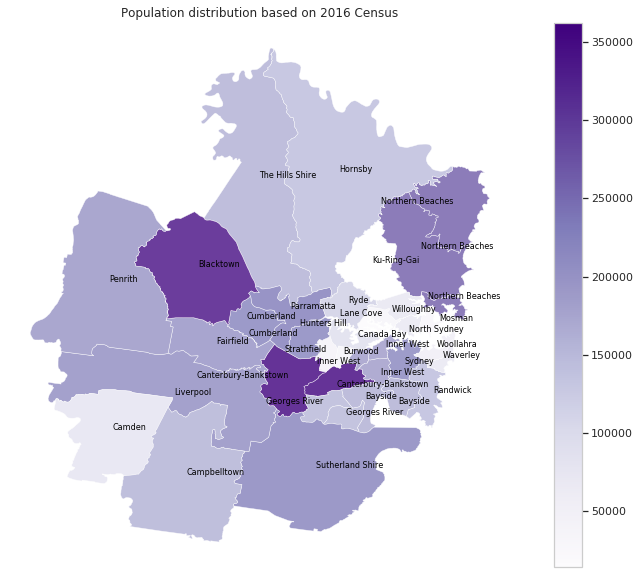

In [80]:
fig, ax = plt.subplots(figsize=(15,10))
img1=df_final.plot(column='2016', cmap ='Purples',
                   legend = True, ax=ax, linewidth=0.5, edgecolor='white', alpha=.8) 
plt.axis('off')
plt.title('Population distribution based on 2016 Census', size =12)


texts = []

#labeling of LGAs
for x, y, label in zip(df_points.geometry.x, df_points.geometry.y, df_points["neighbourhood"]):
    texts.append(plt.text(x, y, label, fontsize = 8, color='black'))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="->", color='grey', lw=0))

## Crime data analysis NSW LGAs 

In [81]:
df_c= pd.read_csv('NSW_Crime.csv')
df_c.head()

,LGA,Offence category,Subcategory,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,...,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019
0,Albury,Homicide,Murder *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albury,Homicide,Attempted murder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albury,Homicide,"Murder accessory, conspiracy",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albury,Homicide,Manslaughter *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albury,Assault,Domestic violence related assault,7,7,7,2,7,6,4,...,30,24,29,31,14,13,22,28,31,27


In [82]:
df_c.shape

(8122, 300)

In [83]:
df_c.columns

Index(['LGA', 'Offence category', 'Subcategory', 'Jan 1995', 'Feb 1995',
       'Mar 1995', 'Apr 1995', 'May 1995', 'Jun 1995', 'Jul 1995',
       ...
       'Dec 2018', 'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019',
       'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019'],
      dtype='object', length=300)

In [84]:
#Let's restrict to only 2019
df_c1=df_c[['LGA', 'Offence category','Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019',
       'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019']]
df_c1.head()

,LGA,Offence category,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019
0,Albury,Homicide,0,0,0,0,0,0,0,0,0
1,Albury,Homicide,0,0,0,0,0,0,0,0,0
2,Albury,Homicide,0,0,0,0,0,0,0,0,0
3,Albury,Homicide,0,0,0,0,0,0,0,0,0
4,Albury,Assault,24,29,31,14,13,22,28,31,27


In [85]:
df_c1.shape

(8122, 11)

In [86]:
#add total of 2019
df_c1['Total_Sep_YTD'] = df_c1.sum(axis=1)
df_c1.rename(columns = {'LGA':'neighbourhood','Offence category':'Category'}, inplace = True)
df_c1.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,neighbourhood,Category,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Total_Sep_YTD
0,Albury,Homicide,0,0,0,0,0,0,0,0,0,0
1,Albury,Homicide,0,0,0,0,0,0,0,0,0,0
2,Albury,Homicide,0,0,0,0,0,0,0,0,0,0
3,Albury,Homicide,0,0,0,0,0,0,0,0,0,0
4,Albury,Assault,24,29,31,14,13,22,28,31,27,219


In [87]:
#get rid of months
df_c2=df_c1[['neighbourhood', 'Category','Total_Sep_YTD']]
df_c2.shape

(8122, 3)

In [88]:
df_c2.groupby(['neighbourhood']).groups.keys()

dict_keys(['Albury', 'Armidale Regional', 'Ballina', 'Balranald', 'Bathurst Regional', 'Bayside', 'Bega Valley', 'Bellingen', 'Berrigan', 'Blacktown', 'Bland', 'Blayney', 'Blue Mountains', 'Bogan', 'Bourke', 'Brewarrina', 'Broken Hill', 'Burwood', 'Byron', 'Cabonne', 'Camden', 'Campbelltown', 'Canada Bay', 'Canterbury-Bankstown', 'Carrathool', 'Central Coast', 'Central Darling', 'Cessnock', 'Clarence Valley', 'Cobar', 'Coffs Harbour', 'Coolamon', 'Coonamble', 'Cootamundra-Gundagai', 'Cowra', 'Cumberland', 'Dubbo Regional', 'Dungog', 'Edward River', 'Eurobodalla', 'Fairfield', 'Federation', 'Forbes', 'Georges River', 'Gilgandra', 'Glen Innes Severn', 'Goulburn Mulwaree', 'Greater Hume Shire', 'Griffith', 'Gunnedah', 'Gwydir', 'Hawkesbury', 'Hay', 'Hilltops', 'Hornsby', 'Hunters Hill', 'In Custody', 'Inner West', 'Inverell', 'Junee', 'Kempsey', 'Kiama', 'Ku-ring-gai', 'Kyogle', 'Lachlan', 'Lake Macquarie', 'Lane Cove', 'Leeton', 'Lismore', 'Lithgow', 'Liverpool', 'Liverpool Plains', 'Loc

In [89]:
df_gr=df_c2.groupby(['neighbourhood','Category']).sum().reset_index()
df_gr.head()

,neighbourhood,Category,Total_Sep_YTD
0,Albury,Abduction and kidnapping,4
1,Albury,Against justice procedures,732
2,Albury,Arson,36
3,Albury,Assault,483
4,Albury,Betting and gaming offences,1


In [90]:
#get lat and long from df_points data
df_latlon=df_points[['neighbourhood','lat','long']]
df_latlon=df_latlon.drop_duplicates(subset='neighbourhood', keep='first').reset_index()
df_latlon.drop(['index'], axis=1,inplace=True)

In [91]:
df_latlon

,neighbourhood,lat,long
0,Northern Beaches,-33.636690,151.283550
1,Randwick,-33.943920,151.239969
2,Waverley,-33.889888,151.266941
3,Lane Cove,-33.819917,151.166908
4,North Sydney,-33.832962,151.211862
5,Canterbury-Bankstown,-33.923859,151.013263
6,Strathfield,-33.880383,151.076620
7,Cumberland,-33.854951,151.045747
8,The Hills Shire,-33.594959,150.964227
9,Hunters Hill,-33.833209,151.144934


In [92]:
#Correcting long/lat for Hills and Hornsdby
df_latlon.loc[8, 'lat']= '-33.6049'
df_latlon.loc[8, 'long']= '150.9773'
df_latlon.loc[19, 'lat']= '-33.7046'
df_latlon.loc[19, 'long']= '151.0987'
df_latlon

,neighbourhood,lat,long
0,Northern Beaches,-33.6367,151.284
1,Randwick,-33.9439,151.24
2,Waverley,-33.8899,151.267
3,Lane Cove,-33.8199,151.167
4,North Sydney,-33.833,151.212
5,Canterbury-Bankstown,-33.9239,151.013
6,Strathfield,-33.8804,151.077
7,Cumberland,-33.855,151.046
8,The Hills Shire,-33.6049,150.9773
9,Hunters Hill,-33.8332,151.145


In [93]:
df_latlon["lat"] = pd.to_numeric(df_latlon["lat"])
df_latlon["long"] = pd.to_numeric(df_latlon["long"])
df_latlon.dtypes

neighbourhood     object
lat              float64
long             float64
dtype: object

In [94]:
#Join crime data with lat/long

df_crime1 = pd.merge(df_gr, df_latlon, on='neighbourhood', how='outer')
df_crime1.shape

(2752, 5)

In [95]:
df_crime1.head()

,neighbourhood,Category,Total_Sep_YTD,lat,long
0,Albury,Abduction and kidnapping,4.0,NaN,NaN
1,Albury,Against justice procedures,732.0,NaN,NaN
2,Albury,Arson,36.0,NaN,NaN
3,Albury,Assault,483.0,NaN,NaN
4,Albury,Betting and gaming offences,1.0,NaN,NaN


In [96]:
df_crime=df_crime1.dropna()

In [97]:
df_crime.shape

(609, 5)

In [98]:
df_crimes=df_crime.reset_index()

In [99]:
df_crimes.drop(['index'], axis=1, inplace=True)

In [100]:
df_crimes.head()

,neighbourhood,Category,Total_Sep_YTD,lat,long
0,Bayside,Abduction and kidnapping,0.0,-33.947482,151.200557
1,Bayside,Against justice procedures,562.0,-33.947482,151.200557
2,Bayside,Arson,19.0,-33.947482,151.200557
3,Bayside,Assault,866.0,-33.947482,151.200557
4,Bayside,Betting and gaming offences,0.0,-33.947482,151.200557


In [101]:
df_crimes['neighbourhood'].nunique()

29

In [102]:
#check if any null values
df_crimes.isnull().sum()

neighbourhood    0
Category         0
Total_Sep_YTD    0
lat              0
long             0
dtype: int64

In [103]:
df_crimes.dtypes

neighbourhood     object
Category          object
Total_Sep_YTD    float64
lat              float64
long             float64
dtype: object

In [104]:
grouped=df_crimes.groupby('neighbourhood').agg({'Total_Sep_YTD':'sum', 'lat':'mean','long':'mean'}).reset_index()
grouped

,neighbourhood,Total_Sep_YTD,lat,long
0,Bayside,8252.0,-33.947482,151.200557
1,Blacktown,34781.0,-33.741305,150.864258
2,Burwood,2218.0,-33.883711,151.103132
3,Camden,3805.0,-34.008801,150.724075
4,Campbelltown,17232.0,-34.083396,150.845797
5,Canada Bay,2720.0,-33.853495,151.114696
6,Canterbury-Bankstown,19196.0,-33.923859,151.013263
7,Cumberland,12256.0,-33.854951,151.045747
8,Fairfield,11994.0,-33.865614,150.895426
9,Georges River,8304.0,-33.965896,151.070124


In [105]:
grouped.columns

Index(['neighbourhood', 'Total_Sep_YTD', 'lat', 'long'], dtype='object')

In [106]:
grouped.dtypes

neighbourhood     object
Total_Sep_YTD    float64
lat              float64
long             float64
dtype: object

In [107]:
#scale the data using normalisation
norm_s = ((grouped['Total_Sep_YTD'] - grouped['Total_Sep_YTD'].min()) / (grouped['Total_Sep_YTD'].max() - grouped['Total_Sep_YTD'].min()))

In [108]:
#add normalised data to the dataframe
grouped['Normalized']=norm_s
grouped

,neighbourhood,Total_Sep_YTD,lat,long,Normalized
0,Bayside,8252.0,-33.947482,151.200557,0.184730
1,Blacktown,34781.0,-33.741305,150.864258,0.818303
2,Burwood,2218.0,-33.883711,151.103132,0.040624
3,Camden,3805.0,-34.008801,150.724075,0.078525
4,Campbelltown,17232.0,-34.083396,150.845797,0.399193
5,Canada Bay,2720.0,-33.853495,151.114696,0.052613
6,Canterbury-Bankstown,19196.0,-33.923859,151.013263,0.446098
7,Cumberland,12256.0,-33.854951,151.045747,0.280354
8,Fairfield,11994.0,-33.865614,150.895426,0.274097
9,Georges River,8304.0,-33.965896,151.070124,0.185972


In [109]:
m = folium.Map(location=[-33.865143,151.209900], zoom_start=12)

for i in range(0,len(grouped)):
    folium.Circle(
      location=[grouped.iloc[i]['lat'], grouped.iloc[i]['long']],
      popup=grouped.iloc[i]['neighbourhood'],
      radius=grouped.iloc[i]['Normalized']*2000+100,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(m)
m

# Save it as html
m.save('mymap.html')

In [110]:
m

# Explore neighbourhoods

In [111]:
#Import required libraries
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

In [112]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KDSP2BMIT2VKL334MBDX3Y11RUROB40K1UQNZ0TMAS2RWJHR
CLIENT_SECRET:IY2JBYWXBH1JTZMC01HSURST1H4NVZ5HTF41RS34WBDGMLU5


In [113]:
address = 'Sydney, New South Wales'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sydney are -33.8888621, 151.2048978618509.


# Create map of Sydney using latitude and longitude values and super impose LGAs

In [114]:
# create map of Sydney using latitude and longitude values
map_Syd = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(grouped['lat'],grouped['long'], grouped['neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_Syd)  
    
map_Syd

### Explore first neighborhood

In [115]:
grouped.loc[25, 'neighbourhood']

'The Hills Shire'

In [116]:
neighbourhood_latitude = grouped.loc[25, 'lat'] # neighborhood latitude value
neighbourhood_longitude = grouped.loc[25, 'long'] # neighborhood longitude value

neighbourhood_name = grouped.loc[25, 'neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of The Hills Shire are -33.60490000000001, 150.9773.


#### Now, let's get the top 100 venues that are in Bayside within a radius of 10KM (As Hills shire is huge!).

In [117]:
LIMIT=100
radius=10000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KDSP2BMIT2VKL334MBDX3Y11RUROB40K1UQNZ0TMAS2RWJHR&client_secret=IY2JBYWXBH1JTZMC01HSURST1H4NVZ5HTF41RS34WBDGMLU5&v=20180605&ll=-33.60490000000001,150.9773&radius=10000&limit=100'

Send the GET request and examine the results

In [118]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e5e30206d8c56001b7464e4'},
 'response': {'headerLocation': 'Sydney',
  'headerFullLocation': 'Sydney',
  'headerLocationGranularity': 'city',
  'totalResults': 15,
  'suggestedBounds': {'ne': {'lat': -33.51489990999992,
    'lng': 151.08515792224748},
   'sw': {'lat': -33.6949000900001, 'lng': 150.86944207775255}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b675ecaf964a520d74a2be3',
       'name': 'Fagan Park',
       'location': {'address': 'Carrs Rd',
        'crossStreet': 'Arcadia Rd',
        'lat': -33.64300628335227,
        'lng': 151.0438121422381,
        'labeledLatLngs': [{'label': 'display',
          'lat': -33.64300628335227,
          'lng': 151.0438121422381}],
        'distance': 7483,
        'cc': 'AU',
    

### Create function to get category of the venue. Then clean the data and create pandas dataframe.

In [119]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [120]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Fagan Park,Park,-33.643006,151.043812
1,Glenorie Bakery Cafe,Bakery,-33.602112,151.008167
2,Wildpear Cafe,Café,-33.677509,151.026269
3,Greenshades Cafe,Café,-33.653460,151.046865
4,Biviano's,Italian Restaurant,-33.683432,151.026244
5,The Local Collective,Café,-33.652820,151.046558
6,Meze Me Grove,Middle Eastern Restaurant,-33.657623,150.931623
7,Australian Hotel And Brewery,Brewery,-33.674026,150.912434
8,Woolworths,Supermarket,-33.601331,151.007305
9,BP,Gas Station,-33.593741,150.916691


In [121]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

15 venues were returned by Foursquare.


## Repeat the process for all neighborhoods

In [122]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Now let's  code to run the above function on each neighborhood and create a new dataframe called S_venues

In [123]:
S_venues = getNearbyVenues(names=grouped['neighbourhood'],
                                   latitudes=grouped['lat'],
                                   longitudes=grouped['long']
                                  )

Bayside
Blacktown
Burwood
Camden
Campbelltown
Canada Bay
Canterbury-Bankstown
Cumberland
Fairfield
Georges River
Hornsby
Hunters Hill
Inner West
Lane Cove
Liverpool
Mosman
North Sydney
Northern Beaches
Parramatta
Penrith
Randwick
Ryde
Strathfield
Sutherland Shire
Sydney
The Hills Shire
Waverley
Willoughby
Woollahra


#### Let's check size of the data

In [124]:
print(S_venues.shape)
S_venues.head()

(2697, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bayside,-33.947482,151.200557,Pullman Sydney Airport,-33.927565,151.186850,Hotel
1,Bayside,-33.947482,151.200557,Bourke Street Bakery,-33.920952,151.193621,Bakery
2,Bayside,-33.947482,151.200557,Sonoma Bakery Café,-33.920593,151.195694,Bakery
3,Bayside,-33.947482,151.200557,Gelato Messina,-33.918210,151.203100,Ice Cream Shop
4,Bayside,-33.947482,151.200557,Archie Rose Distilling Co.,-33.917035,151.202629,Distillery


In [125]:
S_venues.groupby('Neighborhood').count() # Check the number of venues in dataset

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayside,100,100,100,100,100,100
Blacktown,96,96,96,96,96,96
Burwood,100,100,100,100,100,100
Camden,48,48,48,48,48,48
Campbelltown,69,69,69,69,69,69
Canada Bay,100,100,100,100,100,100
Canterbury-Bankstown,100,100,100,100,100,100
Cumberland,100,100,100,100,100,100
Fairfield,100,100,100,100,100,100


### Let's find out how many unique categories of venues is there from all the returned venues

In [126]:
print('There are {} uniques categories.'.format(len(S_venues['Venue Category'].unique())))

There are 192 uniques categories.


# Let's analyze each neighborhood
##### One Hot encoding

In [127]:
# one hot encoding
Syd_onehot = pd.get_dummies(S_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Syd_onehot['Neighborhood'] = S_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Syd_onehot.columns[-1]] + list(Syd_onehot.columns[:-1])
Syd_onehot = Syd_onehot[fixed_columns]

Syd_onehot.head()

,Neighborhood,Afghan Restaurant,Airport Lounge,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,Bakery,...,Video Game Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Bayside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bayside,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Bayside,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Bayside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bayside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
Syd_onehot.shape # Let's examine the size of data

(2697, 193)

Grouping by neighborhood based on frequency of each venue

In [129]:
Syd_groupOHE = Syd_onehot.groupby("Neighborhood").mean().reset_index()
Syd_groupOHE

,Neighborhood,Afghan Restaurant,Airport Lounge,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,Bakery,...,Video Game Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Bayside,0.00,0.01,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.070000,...,0.00,0.000000,0.000000,0.000000,0.00,0.01,0.02,0.00,0.01,0.000000
1,Blacktown,0.00,0.00,0.000000,0.00,0.000000,0.020833,0.000000,0.010417,0.010417,...,0.00,0.000000,0.000000,0.010417,0.00,0.00,0.00,0.00,0.00,0.010417
2,Burwood,0.00,0.00,0.000000,0.00,0.010000,0.010000,0.000000,0.000000,0.040000,...,0.00,0.010000,0.000000,0.000000,0.00,0.00,0.00,0.01,0.00,0.000000
3,Camden,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.020833,0.020833,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
4,Campbelltown,0.00,0.00,0.014493,0.00,0.000000,0.014493,0.028986,0.000000,0.014493,...,0.00,0.043478,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
5,Canada Bay,0.00,0.00,0.010000,0.00,0.000000,0.010000,0.000000,0.000000,0.040000,...,0.00,0.000000,0.000000,0.000000,0.01,0.01,0.00,0.01,0.00,0.000000
6,Canterbury-Bankstown,0.01,0.00,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.010000,...,0.01,0.120000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
7,Cumberland,0.01,0.00,0.000000,0.00,0.000000,0.010000,0.020000,0.000000,0.020000,...,0.00,0.050000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
8,Fairfield,0.01,0.00,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.090000,0.000000,0.000000,0.01,0.00,0.00,0.00,0.00,0.000000
9,Georges River,0.00,0.01,0.010000,0.00,0.010000,0.000000,0.000000,0.000000,0.070000,...,0.01,0.030000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000


In [130]:
Syd_groupOHE.shape # Check shape to see if number of columns intact

(29, 193)

## Create Pandas dataframe for the above

In [131]:
# Sort data in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [132]:
# Creating new data frame with top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Syd_groupOHE['Neighborhood']

for ind in np.arange(Syd_groupOHE.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Syd_groupOHE.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayside,Café,Bar,Ice Cream Shop,Coffee Shop,Bakery,Beach,Brewery,Park,Speakeasy,Restaurant
1,Blacktown,Fast Food Restaurant,Pizza Place,Café,Burger Joint,Supermarket,Grocery Store,Convenience Store,Chinese Restaurant,Park,Pub
2,Burwood,Café,Park,Coffee Shop,Bar,Ice Cream Shop,Brewery,Bakery,Greek Restaurant,Liquor Store,Italian Restaurant
3,Camden,Fast Food Restaurant,Café,Shopping Mall,Grocery Store,Multiplex,Sandwich Place,Supermarket,Juice Bar,Movie Theater,Department Store
4,Campbelltown,Fast Food Restaurant,Grocery Store,Sandwich Place,Café,Pizza Place,Shopping Mall,Vietnamese Restaurant,Supermarket,Restaurant,Racetrack


# k-mean Clustering

In [133]:
# set number of clusters
kclusters = 4

Syd_cluster = Syd_groupOHE.drop("Neighborhood", 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(Syd_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([3, 1, 3, 1, 1, 3, 2, 2, 1, 2, 2, 3, 3, 3, 1, 0, 3, 0, 3, 1, 0, 2,
       2, 0, 3, 2, 0, 0, 0], dtype=int32)

Create a new data frame to include clusters

In [134]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [135]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Bayside,Café,Bar,Ice Cream Shop,Coffee Shop,Bakery,Beach,Brewery,Park,Speakeasy,Restaurant
1,1,Blacktown,Fast Food Restaurant,Pizza Place,Café,Burger Joint,Supermarket,Grocery Store,Convenience Store,Chinese Restaurant,Park,Pub
2,3,Burwood,Café,Park,Coffee Shop,Bar,Ice Cream Shop,Brewery,Bakery,Greek Restaurant,Liquor Store,Italian Restaurant
3,1,Camden,Fast Food Restaurant,Café,Shopping Mall,Grocery Store,Multiplex,Sandwich Place,Supermarket,Juice Bar,Movie Theater,Department Store
4,1,Campbelltown,Fast Food Restaurant,Grocery Store,Sandwich Place,Café,Pizza Place,Shopping Mall,Vietnamese Restaurant,Supermarket,Restaurant,Racetrack


In [136]:
#rename column to match FourSquare format
syd=grouped.rename(columns = {'neighbourhood':'Neighborhood'}, inplace = True)
syd

In [137]:
#keep the ones required
syd=grouped[['Neighborhood','lat','long']]
syd

,Neighborhood,lat,long
0,Bayside,-33.947482,151.200557
1,Blacktown,-33.741305,150.864258
2,Burwood,-33.883711,151.103132
3,Camden,-34.008801,150.724075
4,Campbelltown,-34.083396,150.845797
5,Canada Bay,-33.853495,151.114696
6,Canterbury-Bankstown,-33.923859,151.013263
7,Cumberland,-33.854951,151.045747
8,Fairfield,-33.865614,150.895426
9,Georges River,-33.965896,151.070124


In [138]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
S_merged = syd

S_merged = S_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

S_merged # check the last columns!

,Neighborhood,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayside,-33.947482,151.200557,3,Café,Bar,Ice Cream Shop,Coffee Shop,Bakery,Beach,Brewery,Park,Speakeasy,Restaurant
1,Blacktown,-33.741305,150.864258,1,Fast Food Restaurant,Pizza Place,Café,Burger Joint,Supermarket,Grocery Store,Convenience Store,Chinese Restaurant,Park,Pub
2,Burwood,-33.883711,151.103132,3,Café,Park,Coffee Shop,Bar,Ice Cream Shop,Brewery,Bakery,Greek Restaurant,Liquor Store,Italian Restaurant
3,Camden,-34.008801,150.724075,1,Fast Food Restaurant,Café,Shopping Mall,Grocery Store,Multiplex,Sandwich Place,Supermarket,Juice Bar,Movie Theater,Department Store
4,Campbelltown,-34.083396,150.845797,1,Fast Food Restaurant,Grocery Store,Sandwich Place,Café,Pizza Place,Shopping Mall,Vietnamese Restaurant,Supermarket,Restaurant,Racetrack
5,Canada Bay,-33.853495,151.114696,3,Café,Park,Bar,Brewery,Ice Cream Shop,Coffee Shop,Bakery,Pizza Place,Liquor Store,Pub
6,Canterbury-Bankstown,-33.923859,151.013263,2,Café,Vietnamese Restaurant,Lebanese Restaurant,Park,Chinese Restaurant,Flower Shop,Dessert Shop,Football Stadium,Thai Restaurant,Japanese Restaurant
7,Cumberland,-33.854951,151.045747,2,Café,Park,Lebanese Restaurant,Vietnamese Restaurant,Indian Restaurant,Burger Joint,Korean Restaurant,Thai Restaurant,Flower Shop,Mexican Restaurant
8,Fairfield,-33.865614,150.895426,1,Vietnamese Restaurant,Café,Grocery Store,Thai Restaurant,Italian Restaurant,Gym,Supermarket,Food Truck,Sandwich Place,Park
9,Georges River,-33.965896,151.070124,2,Café,Bakery,Lebanese Restaurant,Burger Joint,Park,Greek Restaurant,Coffee Shop,Dessert Shop,Vietnamese Restaurant,Liquor Store


In [139]:
S_merged.shape

(29, 14)

In [140]:
# create map
latitude = -33.947481925894486
longitude = 151.20055730901626
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.plasma(np.linspace(0, 1, len(ys)))
plasma = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(S_merged['lat'], S_merged['long'], S_merged['Neighborhood'], S_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=plasma[cluster-1],
        fill=True,
        fill_color=plasma[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine clustres

In [141]:
S_merged.loc[S_merged['Cluster Labels'] == 0]

,Neighborhood,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Mosman,-33.829004,151.244547,0,Beach,Park,Café,Scenic Lookout,Hotel,Australian Restaurant,Trail,Bakery,Theater,Italian Restaurant
17,Northern Beaches,-33.636690,151.283550,0,Café,Beach,Australian Restaurant,Park,Grocery Store,Campground,Pub,Pizza Place,Coffee Shop,Flower Shop
20,Randwick,-33.943920,151.239969,0,Café,Beach,Park,Ice Cream Shop,Bar,Bakery,Coffee Shop,Australian Restaurant,Vegetarian / Vegan Restaurant,Pool
23,Sutherland Shire,-34.071107,151.058909,0,Café,Beach,Thai Restaurant,Park,Gym,Burger Joint,Liquor Store,Bar,Golf Course,Scenic Lookout
26,Waverley,-33.889888,151.266941,0,Beach,Café,Park,Australian Restaurant,Scenic Lookout,Bakery,Bar,Ice Cream Shop,Coffee Shop,Theater
27,Willoughby,-33.801141,151.196414,0,Café,Park,Scenic Lookout,Theater,Beach,Cocktail Bar,Bakery,Trail,Hotel,Pub
28,Woollahra,-33.871762,151.257389,0,Café,Beach,Park,Australian Restaurant,Theater,Scenic Lookout,Bakery,Ice Cream Shop,Restaurant,Pizza Place


In [142]:
S_merged.loc[S_merged['Cluster Labels'] == 1]

,Neighborhood,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Blacktown,-33.741305,150.864258,1,Fast Food Restaurant,Pizza Place,Café,Burger Joint,Supermarket,Grocery Store,Convenience Store,Chinese Restaurant,Park,Pub
3,Camden,-34.008801,150.724075,1,Fast Food Restaurant,Café,Shopping Mall,Grocery Store,Multiplex,Sandwich Place,Supermarket,Juice Bar,Movie Theater,Department Store
4,Campbelltown,-34.083396,150.845797,1,Fast Food Restaurant,Grocery Store,Sandwich Place,Café,Pizza Place,Shopping Mall,Vietnamese Restaurant,Supermarket,Restaurant,Racetrack
8,Fairfield,-33.865614,150.895426,1,Vietnamese Restaurant,Café,Grocery Store,Thai Restaurant,Italian Restaurant,Gym,Supermarket,Food Truck,Sandwich Place,Park
14,Liverpool,-33.936056,150.825313,1,Fast Food Restaurant,Café,Supermarket,Gym,Italian Restaurant,Pizza Place,Dessert Shop,Chinese Restaurant,Gym / Fitness Center,Lebanese Restaurant
19,Penrith,-33.765382,150.718155,1,Café,Pizza Place,Grocery Store,Sandwich Place,Gym,Coffee Shop,Thai Restaurant,Fast Food Restaurant,Convenience Store,Sports Bar


In [143]:
S_merged.loc[S_merged['Cluster Labels'] == 2]

,Neighborhood,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Canterbury-Bankstown,-33.923859,151.013263,2,Café,Vietnamese Restaurant,Lebanese Restaurant,Park,Chinese Restaurant,Flower Shop,Dessert Shop,Football Stadium,Thai Restaurant,Japanese Restaurant
7,Cumberland,-33.854951,151.045747,2,Café,Park,Lebanese Restaurant,Vietnamese Restaurant,Indian Restaurant,Burger Joint,Korean Restaurant,Thai Restaurant,Flower Shop,Mexican Restaurant
9,Georges River,-33.965896,151.070124,2,Café,Bakery,Lebanese Restaurant,Burger Joint,Park,Greek Restaurant,Coffee Shop,Dessert Shop,Vietnamese Restaurant,Liquor Store
10,Hornsby,-33.704600,151.098700,2,Café,Park,Thai Restaurant,Italian Restaurant,Korean Restaurant,Burger Joint,Clothing Store,Golf Course,Fried Chicken Joint,Coffee Shop
21,Ryde,-33.799182,151.110713,2,Café,Park,Gym,Coffee Shop,Korean Restaurant,Burger Joint,Supermarket,Clothing Store,Liquor Store,Italian Restaurant
22,Strathfield,-33.880383,151.076620,2,Café,Park,Lebanese Restaurant,Brewery,Vietnamese Restaurant,Farmers Market,Coffee Shop,Ice Cream Shop,Bakery,Liquor Store
25,The Hills Shire,-33.604900,150.977300,2,Café,Supermarket,Bakery,National Park,Park,Event Space,Grocery Store,Brewery,Italian Restaurant,Pool


In [144]:
S_merged.loc[S_merged['Cluster Labels'] == 3]

,Neighborhood,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayside,-33.947482,151.200557,3,Café,Bar,Ice Cream Shop,Coffee Shop,Bakery,Beach,Brewery,Park,Speakeasy,Restaurant
2,Burwood,-33.883711,151.103132,3,Café,Park,Coffee Shop,Bar,Ice Cream Shop,Brewery,Bakery,Greek Restaurant,Liquor Store,Italian Restaurant
5,Canada Bay,-33.853495,151.114696,3,Café,Park,Bar,Brewery,Ice Cream Shop,Coffee Shop,Bakery,Pizza Place,Liquor Store,Pub
11,Hunters Hill,-33.833209,151.144934,3,Café,Park,Hotel,Theater,Scenic Lookout,Coffee Shop,Cocktail Bar,Bakery,Pub,Pizza Place
12,Inner West,-33.885687,151.130707,3,Café,Park,Coffee Shop,Bar,Ice Cream Shop,Brewery,Bakery,Bookstore,Thai Restaurant,Hotel
13,Lane Cove,-33.819917,151.166908,3,Café,Park,Scenic Lookout,Hotel,Theater,Cocktail Bar,Coffee Shop,Pub,Bakery,Trail
16,North Sydney,-33.832962,151.211862,3,Café,Park,Scenic Lookout,Hotel,Theater,Coffee Shop,Bakery,Cocktail Bar,Italian Restaurant,Trail
18,Parramatta,-33.809763,151.015410,3,Park,Café,Lebanese Restaurant,Burger Joint,Thai Restaurant,Indian Restaurant,Supermarket,Bakery,Coffee Shop,Dessert Shop
24,Sydney,-33.889671,151.202739,3,Coffee Shop,Café,Bar,Park,Ice Cream Shop,Bakery,Thai Restaurant,Theater,Whisky Bar,Restaurant


In [145]:
S_merged.loc[S_merged['Cluster Labels'] == 4]

,Neighborhood,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [146]:
S_merged.loc[S_merged['Cluster Labels'] == 5]

,Neighborhood,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


## ----------------------End of notebook---------------------